In [2]:
import pandas as pd

In [3]:
df= pd.read_excel('Airlines+Data.xlsx', header=0, index_col=0, parse_dates=True)

In [4]:
df.head()

,Passengers
Month,
1995-01-01,112
1995-02-01,118
1995-03-01,132
1995-04-01,129
1995-05-01,121


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 96 entries, 1995-01-01 to 2002-12-01
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   Passengers  96 non-null     int64
dtypes: int64(1)
memory usage: 1.5 KB


# visualizing the data

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

### Line Plot

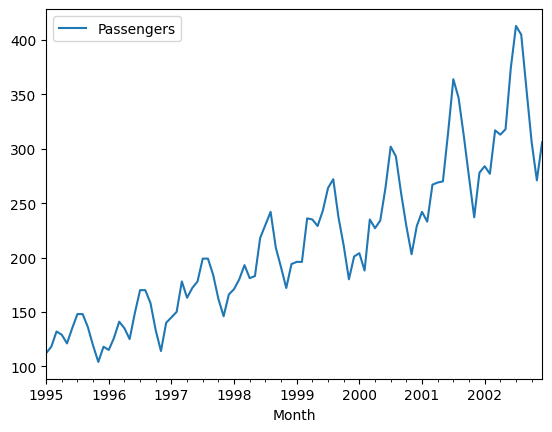

In [7]:
df.plot()
plt.show()

## Histogram and Density Plots

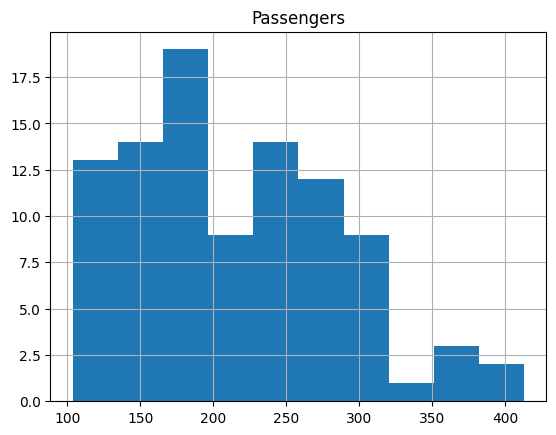

In [8]:
df.hist()
plt.show()

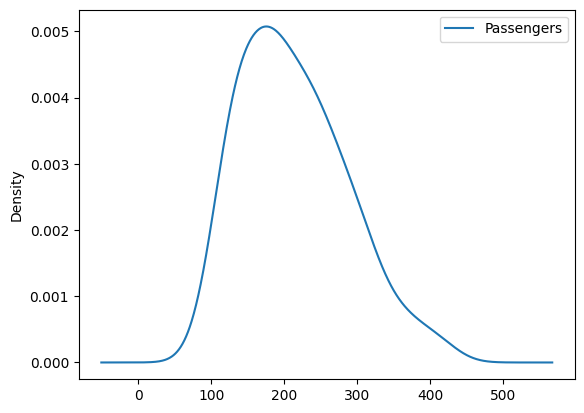

In [9]:
df.plot(kind='kde')
plt.show()

### Box and Whisker Plots by interval 

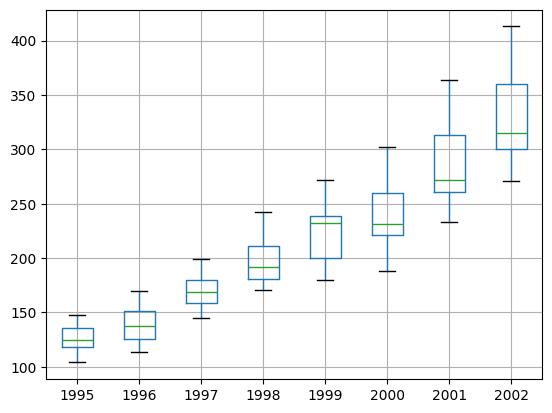

In [10]:
from pandas import DataFrame
from pandas import Grouper
# Group the data by year
groups = df.groupby(Grouper(freq='YE'))  # Updated frequency to 'YE'

# Create an empty DataFrame to store the yearly data
years = DataFrame()

# Iterate over the groups and store the data in the DataFrame
for Passengers, group in groups:
    years[Passengers.year] = group.values.flatten()  # Flatten the array to make it 1-dimensional

# Create the boxplot
years.boxplot()

# Show the plot
plt.show()

## Lag Plot

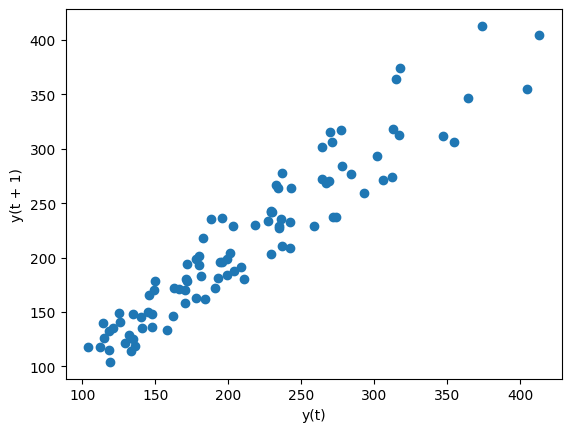

In [11]:
# create a scatter plot
from pandas.plotting import lag_plot
df = pd.read_excel('Airlines+Data.xlsx', header=0, index_col=0, parse_dates=True)
lag_plot(df)
plt.show()

## ACF plots and PACF plots

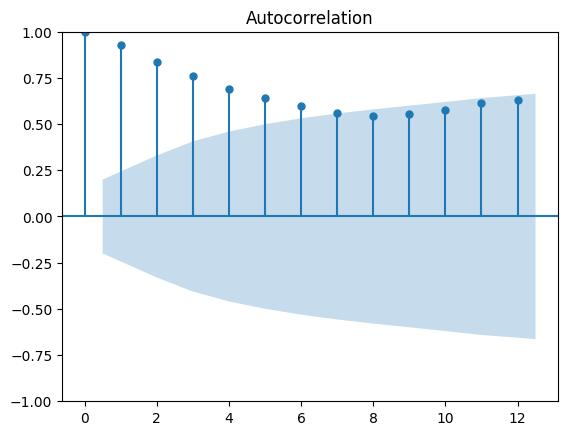

In [12]:
# create an autocorrelation plot
from statsmodels.graphics.tsaplots import plot_acf
df = pd.read_excel('Airlines+Data.xlsx', header=0, index_col=0,parse_dates=True)
plot_acf(df,lags=12)
plt.show()

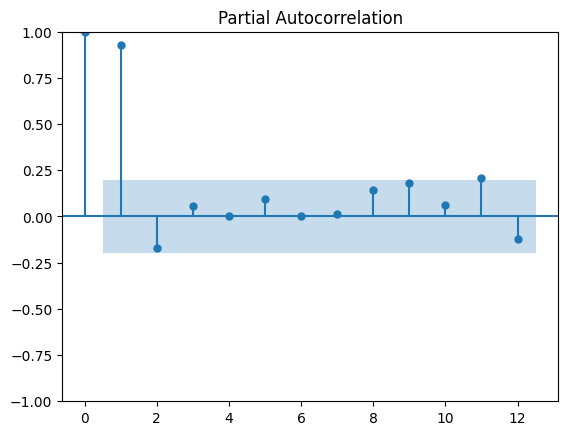

In [13]:
# create an autocorrelation plot
from statsmodels.graphics.tsaplots import plot_pacf
df = pd.read_excel('Airlines+Data.xlsx', header=0, index_col=0,parse_dates=True)
plot_pacf(df,lags=12)
plt.show()

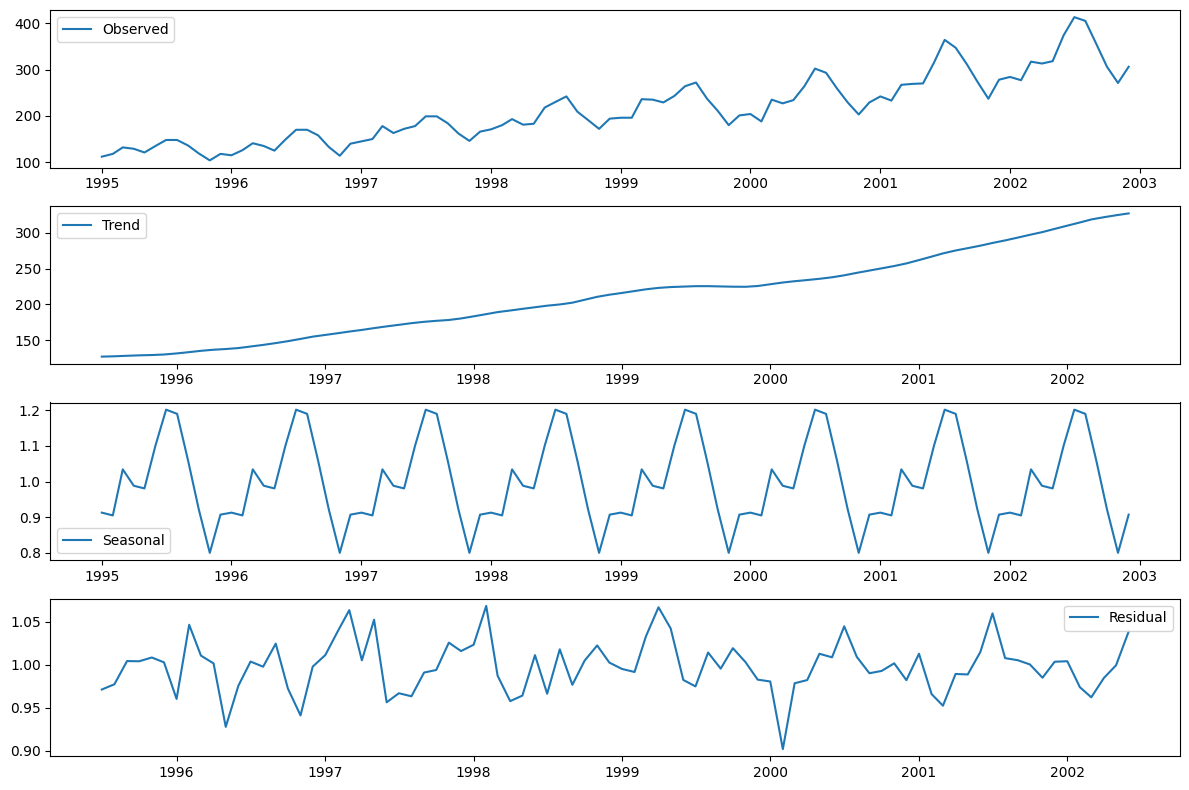

In [14]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Perform seasonal decomposition
result = seasonal_decompose(df['Passengers'], model='multiplicative', period=12)

# Plot the decomposition
plt.figure(figsize=(12, 8))
plt.subplot(411)
plt.plot(result.observed, label='Observed')
plt.legend()

plt.subplot(412)
plt.plot(result.trend, label='Trend')
plt.legend()

plt.subplot(413)
plt.plot(result.seasonal, label='Seasonal')
plt.legend()

plt.subplot(414)
plt.plot(result.resid, label='Residual')
plt.legend()

plt.tight_layout()
plt.show()


In [15]:
#### or

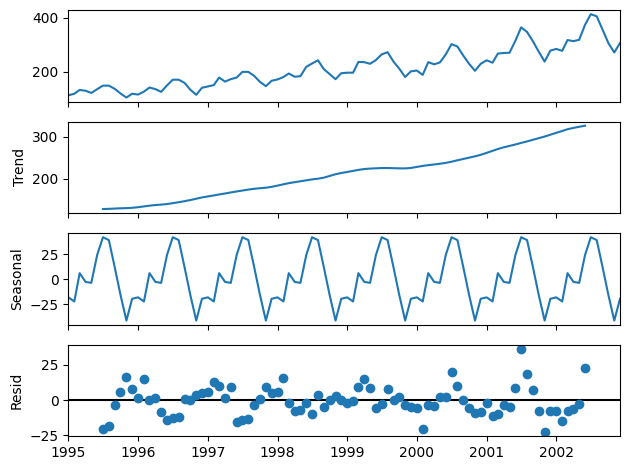

In [16]:
from statsmodels.tsa.seasonal import seasonal_decompose

data = pd.read_excel('Airlines+Data.xlsx', header=0, index_col=0)

# Perform seasonal decomposition
decompose_ts = seasonal_decompose(data, period=12)

# Plot the decomposition
decompose_ts.plot()
plt.show()

In [17]:
# ACF and PACF plots

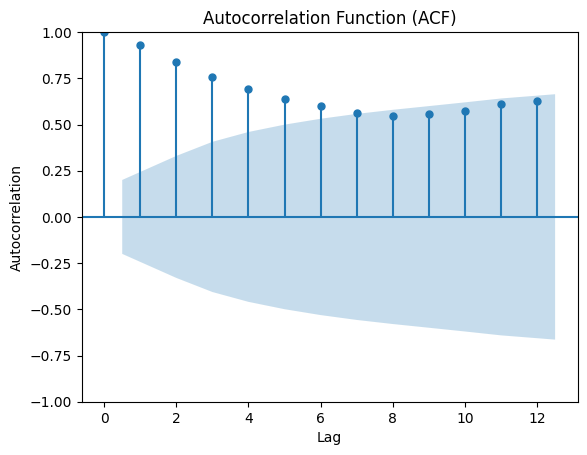

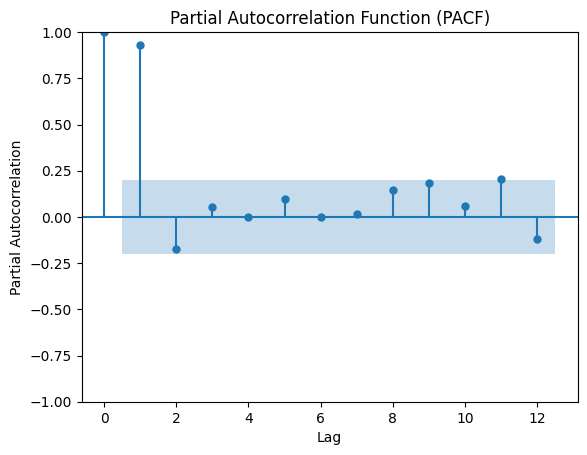

In [18]:
import statsmodels.graphics.tsaplots as tsa_plots

# Plotting Autocorrelation Function (ACF)
tsa_plots.plot_acf(data, lags=12) 
# Autocorrelation values exceeding +-2 standard errors are considered significant
plt.title('Autocorrelation Function (ACF)')
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.show()

# Plotting Partial Autocorrelation Function (PACF)
tsa_plots.plot_pacf(data, lags=12) 
# Partial autocorrelation values exceeding +-2 standard errors are considered significant
plt.title('Partial Autocorrelation Function (PACF)')
plt.xlabel('Lag')
plt.ylabel('Partial Autocorrelation')
plt.show()


# Splitting the data

In [19]:
train = df.head(72)
test = df.tail(24)

## moving average

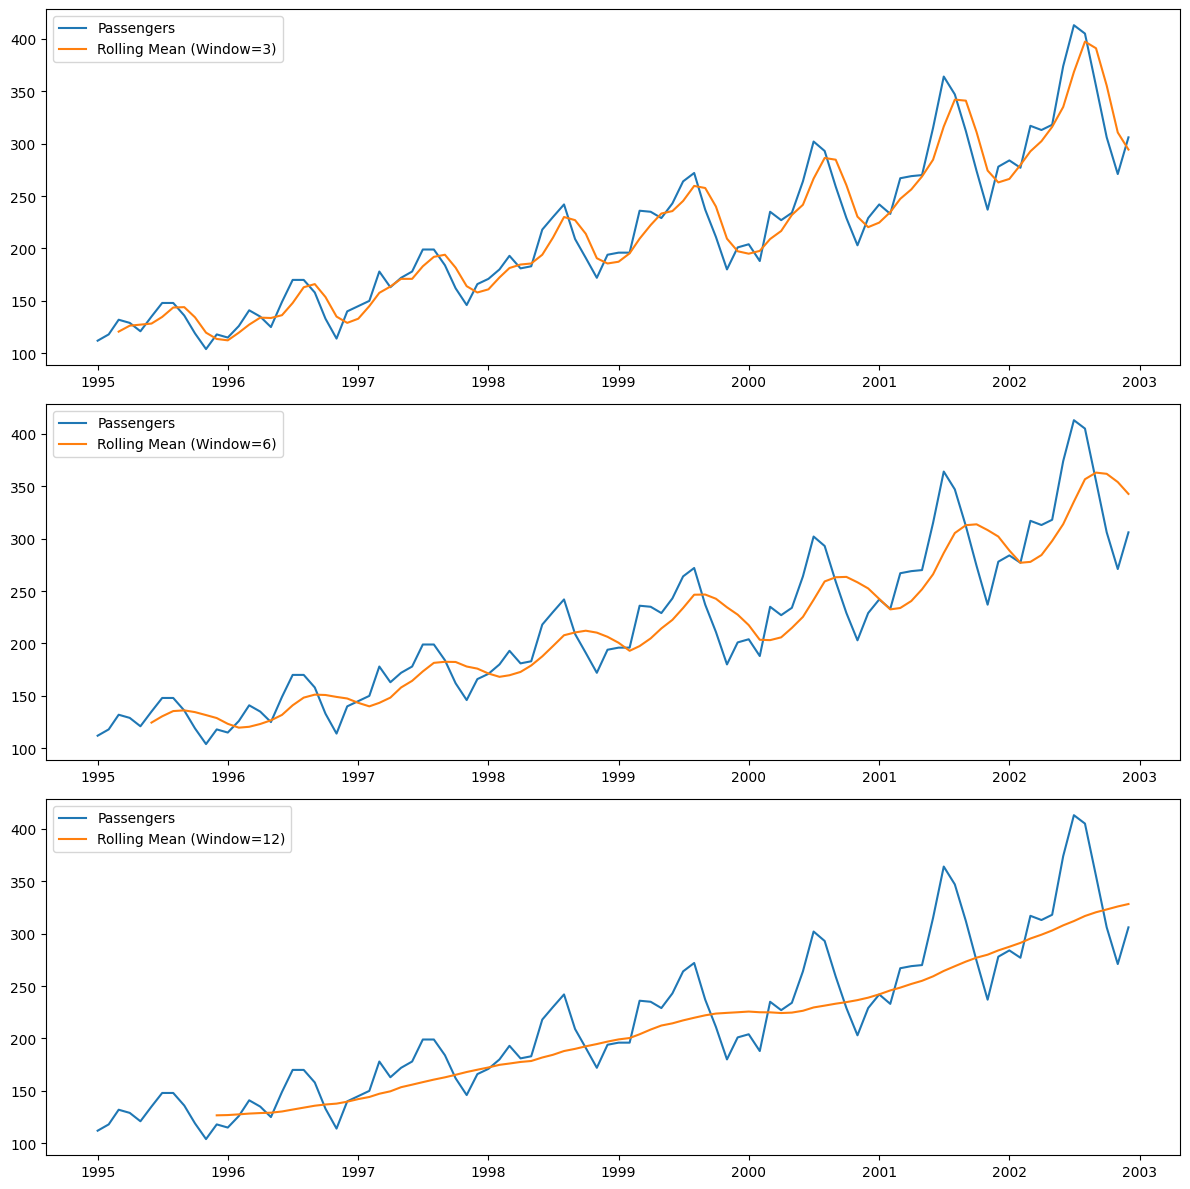

In [24]:
import matplotlib.pyplot as plt

# Assuming df is your DataFrame and Passengers is the column you want to plot
lst = [3, 6, 12]

# Create a figure with subplots
fig, axs = plt.subplots(len(lst), 1, figsize=(12, 4 * len(lst)))

# Plot each rolling mean in a separate subplot
for i, window_size in enumerate(lst):
    ax = axs[i]
    ax.plot(df['Passengers'], label='Passengers')
    ax.plot(df['Passengers'].rolling(window_size).mean(), label=f'Rolling Mean (Window={window_size})')
    ax.legend(loc='best')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()


# Time Series Decomposition Plot

In [ ]:
decompose_ts_add = seasonal_decompose(df.Passengers,period=12)
decompose_ts_add.plot()
plt.show()

## Evaluation metric MAPE

## Simple Exponential Method

In [ ]:
import numpy as np

# Split data into train and test sets
train_size = int(len(data) * 0.8)  # 80% of data for training
train = data[:train_size]
test = data[train_size:]

from statsmodels.tsa.holtwinters import SimpleExpSmoothing

# Fit Simple Exponential Smoothing model
ses_model = SimpleExpSmoothing(train["Passengers"]).fit(smoothing_level=0.2, optimized=False)

# Predict on the test set
pred_ses = ses_model.predict(start=test.index[0], end=test.index[-1])

# Calculate MAPE
def MAPE(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

mape = MAPE(test["Passengers"], pred_ses)
print("MAPE for Simple Exponential Smoothing Model:", mape)


## Holt Moethod

In [ ]:
from statsmodels.tsa.holtwinters import Holt

# Fit Holt method model
hw_model = Holt(train["Passengers"]).fit(smoothing_level=0.8, smoothing_trend=0.2, optimized=False)

# Predict on the test set
pred_hw = hw_model.predict(start=test.index[0], end=test.index[-1])

# Calculate MAPE
mape_hw = MAPE(test["Passengers"], pred_hw)
print("MAPE for Holt method:", mape_hw)

## Holts winter exponential smoothing

### with additive seasonality and additive trend

In [ ]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# Fit Holt-Winters method model with additive trend and additive seasonal component
hwe_model_add_add = ExponentialSmoothing(train["Passengers"], seasonal="add", trend="add", seasonal_periods=12).fit()

# Predict on the test set
pred_hwe_add_add = hwe_model_add_add.predict(start=test.index[0], end=test.index[-1])

# Calculate MAPE
mape_hwe_add_add = MAPE(test["Passengers"], pred_hwe_add_add)
print("MAPE for Holt-Winters method with additive trend and additive seasonal component:", mape_hwe_add_add)


## Holts winter exponential smoothing

### with multiplicative seasonality and additive trend

In [ ]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# Fit Holt-Winters method model with multiplicative seasonal and additive trend
hwe_model_mul_add = ExponentialSmoothing(train["Passengers"], seasonal="mul", trend="add", seasonal_periods=12).fit()

# Predict on the test set
pred_hwe_mul_add = hwe_model_mul_add.predict(start=test.index[0], end=test.index[-1])

# Calculate MAPE
mape_hwe_mul_add = MAPE(test["Passengers"], pred_hwe_mul_add)
print("MAPE for Holt-Winters method with multiplicative seasonal and additive trend:", mape_hwe_mul_add)


## Final Model by combining train and test

In [ ]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# Fit Holt-Winters method model with additive seasonal and additive trend
hwe_model_add_add = ExponentialSmoothing(df["Passengers"], seasonal="add", trend="add", seasonal_periods=12).fit()

# Forecasting for next 10 time periods
forecast_next_12_periods = hwe_model_add_add.forecast(12)

print("Forecast for the next 12 time periods:")
print(forecast_next_12_periods)


## Persistence/ Base model

In [ ]:
from pandas import read_excel
df = read_excel('Airlines+Data.xlsx', header=0, index_col=0, parse_dates=True)
df

In [ ]:
# Separate out a validation dataset
split_point = len(df) - 12
dataset, validation = df.iloc[:split_point], df.iloc[split_point:]
print('Dataset %d, Validation %d' % (len(dataset), len(validation)))
dataset.to_csv('dataset.csv', header=False)
validation.to_csv('validation.csv', header=False)

In [ ]:
from pandas import read_csv
from sklearn.metrics import mean_squared_error
from math import sqrt

# Load data
dataset = read_csv('dataset.csv', header=None, index_col=0, parse_dates=True)

# Prepare data
X = dataset.values.astype('float32')
train_size = int(len(X) - 12)
train, test = X[:train_size], X[train_size:]


In [ ]:
from math import sqrt
from sklearn.metrics import mean_squared_error

history = [x for x in train]
predictions = list()

for i in range(len(test)):
    # Make prediction
    yhat = history[-1]  # Previous observation
    predictions.append(yhat)
    # Observation
    obs = test[i]  # Current observation
    history.append(obs)
    print('> Predicted=%.3f, Expected=%.3f' % (yhat[0], obs[0]))

# Report performance
rmse = sqrt(mean_squared_error(test, predictions))
print('RMSE: %.3f' % rmse)


## ARIMA Hyperparameters

In [ ]:
# grid search ARIMA parameters for a time series

from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error
from math import sqrt


# evaluate an ARIMA model for a given order (p,d,q) and return RMSE
def evaluate_arima_model(X, arima_order):
# prepare training dataset
    X = X.astype('float32')
    train_size = int(len(X) - 12)
    train, test = X[0:train_size], X[train_size:]
    history = [x for x in train]
# make predictions
    predictions = list()
    for t in range(len(test)):
        model = ARIMA(history, order=arima_order)
# model_fit = model.fit(disp=0)
        model_fit = model.fit(disp=0)
        yhat = model_fit.forecast()[0]
        predictions.append(yhat)
        history.append(test[t])
# calculate out of sample error
    rmse = sqrt(mean_squared_error(test, predictions))
    return rmse

### Grid search for p,d,q values

In [ ]:
# evaluate combinations of p, d and q values for an ARIMA model
def evaluate_models(dataset, p_values, d_values, q_values):
    dataset = dataset.astype('float32')
    best_score, best_cfg = float('inf'), None
    for p in p_values:
        for d in d_values:
            for q in q_values:
                order = (p,d,q)
                try:
                    rmse = evaluate_arima_model(train, order)
                    if rmse < best_score:
                        best_score, best_cfg = rmse, order
                    print('ARIMA%s RMSE=%.3f' % (order,rmse))
                except:
                    continue
    print('Best ARIMA%s RMSE=%.3f' % (best_cfg, best_score))

In [ ]:
# load dataset
train = read_csv('dataset.csv', header=None, index_col=0, parse_dates=True)
# evaluate parameters
#p_values = range(0, 5)
#d_values = range(0, 5)
#q_values = range(0, 5)
#evaluate_models(train.values, p_values, d_values, q_values)

### Build Model based on the optimized values

In [ ]:
# save finalized model to file
from pandas import read_csv
from statsmodels.tsa.arima_model import ARIMA
import numpy

In [ ]:
# load data
train = read_csv('dataset.csv', header=0, index_col=0, parse_dates=True)
# prepare data
X = train.values
X = X.astype('float32')

In [ ]:
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt
import statsmodels.api as sm

# Fit model
model = ARIMA(X, order=(3,1,0))
model_fit = model.fit()

# Forecast
forecast = model_fit.forecast(steps=12)

# Plot the forecast
plt.figure(figsize=(12, 6))
plt.plot(X, label='Observed')
plt.plot(range(len(X), len(X) + len(forecast)), forecast, color='red', label='Forecast')
plt.xlabel('Time')
plt.ylabel('Value')
plt.title('ARIMA Forecast')
plt.legend()
plt.show()


In [ ]:
#Error on the test data
val=pd.read_csv('validation.csv',header=None)
rmse = sqrt(mean_squared_error(val[1], forecast))
rmse

### Combine train and test data and build final model

In [ ]:
# fit model
data = read_excel('Airlines+Data.xlsx', header=0, index_col=0, parse_dates=True)
# prepare data
X = train.values
X = X.astype('float32')

In [ ]:
model = ARIMA(X, order=(3,1,0))
model_fit = model.fit()


In [ ]:
forecast=model_fit.forecast(steps=12)[0]
#model_fit.plot_predict(1,80)

In [ ]:
int(forecast)

In [ ]:
# Assuming you want to forecast for the same length as X
forecast_length = len(X)
forecast_array = np.repeat(forecast, forecast_length)

# Plot the forecast
plt.plot(X, label='Observed')
plt.plot(range(len(X), len(X) + forecast_length), forecast_array, color='red', label='Forecast')
plt.xlabel('Time')
plt.ylabel('Value')
plt.title('ARIMA Forecast')
plt.legend()
plt.show()


## upsampling data

In [ ]:
df = read_excel('Airlines+Data.xlsx', header=0, index_col=0, parse_dates=True)

In [ ]:
df

In [ ]:
upsampled = df.resample('D').mean()
print(upsampled.head(32))

##### interpolate the missing value

In [ ]:
interpolated = upsampled.interpolate(method='linear')
print(interpolated.head(32))
interpolated.plot()
plt.show()

### Downsampling Data

In [ ]:
# downsample to quarterly intervals
from pandas import read_csv
#from pandas import datetime
from matplotlib import pyplot

In [ ]:
resample = df.resample('QE')
quarterly_mean_sales = resample.mean()

### Tranformations

In [ ]:
# line plot
pyplot.subplot(211)
pyplot.plot(df)
# histogram
pyplot.subplot(212)
pyplot.hist(df)
pyplot.show()

### Square Root Transform

In [ ]:
from pandas import read_csv
from pandas import DataFrame
from numpy import sqrt
from matplotlib import pyplot

In [ ]:
dataframe = DataFrame(df.values)
dataframe.columns = ['passengers']
dataframe['passengers'] = sqrt(dataframe['passengers'])

In [ ]:
# line plot
pyplot.subplot(211)
pyplot.plot(dataframe['passengers'])
# histogram
pyplot.subplot(212)
pyplot.hist(dataframe['passengers'])
pyplot.show()

### Log transform

In [ ]:
from numpy import log
dataframe = DataFrame(df.values)
dataframe.columns = ['passengers']
dataframe['passengers'] = log(dataframe['passengers'])

# line plot
pyplot.subplot(211)
pyplot.plot(dataframe['passengers'])
# histogram
pyplot.subplot(212)
pyplot.hist(dataframe['passengers'])
pyplot.show()

In [ ]:
print(quarterly_mean_sales.head())
quarterly_mean_sales.plot()
pyplot.show()

In [ ]:
df = pd.read_excel('Airlines+Data.xlsx')
df.head()

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'Month' column is already in datetime format, if not, convert it first
df["Month"] = pd.to_datetime(df["Month"])

# Extracting year and month into separate columns
df["Year"] = df["Month"].dt.year
df["Month"] = df["Month"].dt.month

# Create a pivot table
pivot_df = df.pivot_table(index='Month', columns='Year', values='Passengers', aggfunc='mean')

# Plot the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(pivot_df, cmap="YlGnBu", annot=True, fmt=".1f", linewidths=0.5)
plt.title('Passenger Count Heatmap')
plt.xlabel('Year')
plt.ylabel('Month')
plt.show()


In [ ]:
df

In [ ]:
# Boxplot for ever
plt.figure(figsize=(8,6))
plt.subplot(211)
sns.boxplot(x="Month",y="Passengers",data=df)
plt.subplot(212)
sns.boxplot(x="Year",y="Passengers",data=df)


In [ ]:
plt.figure(figsize=(12,3))
sns.lineplot(x="Year",y="Passengers",data=df)

### Preprocess the data

#### Transformations

In [ ]:
df

In [ ]:
import numpy as np
import pandas as pd

# Adding t values >> new variable 1
df.loc[:, 't'] = np.arange(1, df.shape[0] + 1)

# Adding t_sqr values >> new variable 2
df.loc[:, 't_sqr'] = df['t']**2

# Adding log_ values >> new variable 3
df.loc[:, 'log_psgr'] = np.log(df['Passengers'])

# Generating dummies for months
month_dummies = pd.get_dummies(df['Month'], prefix='month')
df = pd.concat([df, month_dummies], axis=1)


In [ ]:
df.head()

In [ ]:
df.tail()

In [ ]:
# Assuming 'data' is your DataFrame with boolean columns

# List of boolean columns to encode
boolean_columns = ['month_1', 'month_2', 'month_3', 'month_4', 'month_5', 'month_6', 'month_7', 'month_8', 'month_9', 'month_10', 'month_11', 'month_12']

# Encode boolean values to numerical values (0 or 1)
df[boolean_columns] = df[boolean_columns].astype(int)


In [ ]:
df.head()

### Splitting the data

In [ ]:
Train = df.head(84)
Test = df.tail(12)

In [ ]:
#Linear Model
import statsmodels.formula.api as smf 

linear_model = smf.ols('Passengers~t',data=Train).fit()
pred_linear =  pd.Series(linear_model.predict(pd.DataFrame(Test['t'])))
rmse_linear = np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(pred_linear))**2))
rmse_linear

In [ ]:
#Exponential

Exp = smf.ols('log_psgr~t',data=Train).fit()
pred_Exp = pd.Series(Exp.predict(pd.DataFrame(Test['t'])))
rmse_Exp = np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(np.exp(pred_Exp)))**2))
rmse_Exp


In [ ]:
#Quadratic 

Quad = smf.ols('Passengers~t+t_sqr',data=Train).fit()
pred_Quad = pd.Series(Quad.predict(Test[["t","t_sqr"]]))
rmse_Quad = np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(pred_Quad))**2))
rmse_Quad

In [ ]:
#Additive seasonality 

add_sea = smf.ols('Passengers~month_1+month_2+month_3+month_4+month_5+month_6+month_7+month_8+month_9+month_10+month_11+month_12',data=Train).fit()
pred_add_sea = pd.Series(add_sea.predict(Test[['month_1','month_2','month_3','month_4','month_5','month_6','month_7','month_8','month_9','month_10','month_11','month_12']]))
rmse_add_sea = np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(pred_add_sea))**2))
rmse_add_sea

In [ ]:
#Additive Seasonality Quadratic 

add_sea_Quad = smf.ols('Passengers~t+t_sqr+month_1+month_2+month_3+month_4+month_5+month_6+month_7+month_8+month_9+month_10+month_11+month_12',data=Train).fit()
pred_add_sea_quad = pd.Series(add_sea_Quad.predict(Test[['month_1','month_2','month_3','month_4','month_5','month_6','month_7','month_8','month_9','month_10','month_11','month_12','t','t_sqr']]))
rmse_add_sea_quad = np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(pred_add_sea_quad))**2))
rmse_add_sea_quad

In [ ]:
##Multiplicative Seasonality

Mul_sea = smf.ols('log_psgr~month_1+month_2+month_3+month_4+month_5+month_6+month_7+month_8+month_9+month_10+month_11+month_12',data = Train).fit()
pred_Mult_sea = pd.Series(Mul_sea.predict(Test))
rmse_Mult_sea = np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(np.exp(pred_Mult_sea)))**2))
rmse_Mult_sea

In [ ]:
#Multiplicative Additive Seasonality 

Mul_Add_sea = smf.ols('log_psgr~t+month_1+month_2+month_3+month_4+month_5+month_6+month_7+month_8+month_9+month_10+month_11+month_12',data = Train).fit()
pred_Mult_add_sea = pd.Series(Mul_Add_sea.predict(Test))
rmse_Mult_add_sea = np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(np.exp(pred_Mult_add_sea)))**2))
rmse_Mult_add_sea 

In [ ]:
#Compare the results 

data = {"MODEL":pd.Series(["rmse_linear","rmse_Exp","rmse_Quad","rmse_add_sea","rmse_add_sea_quad","rmse_Mult_sea","rmse_Mult_add_sea"]),"RMSE_Values":pd.Series([rmse_linear,rmse_Exp,rmse_Quad,rmse_add_sea,rmse_add_sea_quad,rmse_Mult_sea,rmse_Mult_add_sea])}
table_rmse=pd.DataFrame(data)
table_rmse.sort_values(['RMSE_Values'])

# Model Evaluation - Additive Seasonality Quadratic

In [ ]:
data = df.copy()

In [ ]:
data.head()

In [ ]:
data.columns.values

In [ ]:
data = data[['Month', 'Passengers', 'Year', 't']]

In [ ]:
data

In [ ]:
data['Preddicted'] = 